In [690]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import prince
from sklearn import preprocessing, ensemble
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from collections import Counter # R's table
from scipy import optimize
%matplotlib inline

In [786]:
# Loading training set
train = pd.read_csv('train.csv')

loading training set...


## Exploratory Data Analysis (EDA)

In [3]:
print('{} rows and {} columns.'. format(train.shape[0], train.shape[1]))

114321 rows and 133 columns.


In [4]:
train.describe() # Statistics summary

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,114189.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,171206.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [5]:
categoricals = train.select_dtypes(include=['O']); categoricals # Categorical variable

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z
5,C,AYX,A,NaN,A,I,K,DX,A,F,B,D,I,G,C,A,D,X,X
6,C,NFD,E,G,A,C,A,AS,A,F,B,D,E,B,B,B,I,NaN,BJ
7,C,AHBW,D,C,A,I,C,DP,C,F,B,D,C,A,E,A,F,M,BY
8,NaN,GKQ,E,NaN,NaN,D,H,AF,B,B,B,B,P,C,D,C,L,NaN,S
9,C,PYF,C,C,A,I,A,NaN,A,F,B,D,C,A,E,A,J,P,E


In [6]:
numericals = train.select_dtypes(include=['float','int']).drop(['ID','target'], axis=1); numericals # Numerical variable

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,1.335739e+00,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,0.803572,8.000000,1.989780,3.575369e-02,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,5.988956e-01,NaN,NaN,1.957825,0,NaN,NaN
2,9.438769e-01,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.238806,9.333333,2.477596,1.345191e-02,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,7.974146e-01,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.956521,7.018256,1.812795,2.267384e-03,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5,NaN,NaN,NaN,8.856791,NaN,NaN,0.359993,NaN,1.050328,NaN,...,NaN,NaN,NaN,4.986116e-02,NaN,NaN,1.536222,0,NaN,NaN
6,8.998057e-01,7.312995,3.494148,9.946200,1.926070,1.770427,0.066251,5.011287,2.341356,16.274510,...,2.232558,3.476299,1.992594,8.375832e-02,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838074,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8,2.078651e+00,8.462619,3.739030,5.265636,1.573033,2.303371,0.015869,11.111111,4.463894,16.050955,...,1.276595,8.148148,1.875560,1.865950e-02,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,1.144802e+00,5.880606,3.244469,9.538384,2.500001,1.559405,0.412610,9.977529,2.363238,16.091401,...,2.715964,7.325843,4.896617,8.943653e-03,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00


In [7]:
pca = PCA(n_components=2)
pca.fit(numericals.dropna(axis=0))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Correlation of Categorical Variables

In [8]:
mapped_categoricals = categoricals.copy()
for c in categoricals:
    mapping = Counter(categoricals[c])
    mapped_categoricals[c] = categoricals[c].map(mapping)

In [9]:
categorical_corr = mapped_categoricals.corr()

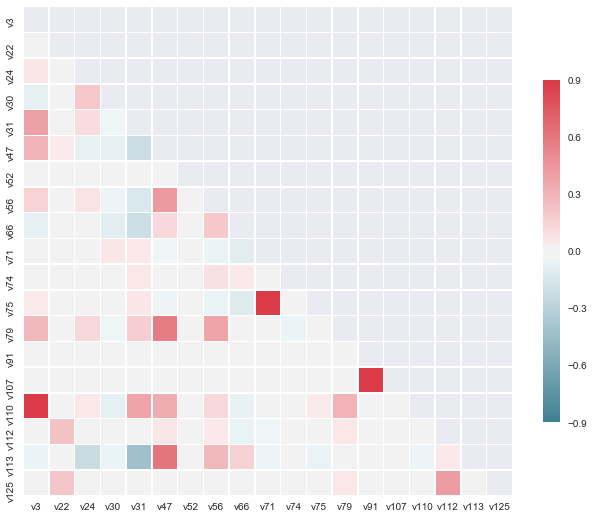

In [10]:
mask = np.zeros_like(categorical_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(categorical_corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

### Categorical variable: v91 - v107

In [11]:
v91 = pd.crosstab(index=train['v91'], columns='counter').sort_values('counter'); v91

col_0,counter
v91,
D,230
E,3206
F,13418
B,22683
C,23157
G,24545
A,27079


In [12]:
v107 = pd.crosstab(index=train['v107'], columns='counter').sort_values('counter'); v107

col_0,counter
v107,
G,230
F,3206
A,13418
B,22683
D,23157
C,24545
E,27079


In [13]:
v91_v107 = pd.crosstab(index=train['v91'], columns=train['v107']); v91_v107

v107,A,B,C,D,E,F,G
v91,,,,,,,
A,0,0,0,0,27079,0,0
B,0,22683,0,0,0,0,0
C,0,0,0,23157,0,0,0
D,0,0,0,0,0,0,230
E,0,0,0,0,0,3206,0
F,13418,0,0,0,0,0,0
G,0,0,24545,0,0,0,0


In [14]:
stats.chisquare(f_obs= v91,   # Array of observed counts
                f_exp= v107)   # Array of expected counts

Power_divergenceResult(statistic=array([ 0.]), pvalue=array([ 1.]))

The two variables are duplicates based on the frequency tables and chi-squared test(the null hypothesis that the categorical data has the given frequencies). v107 could
be deleted. 

### Categorical variable: v71 - v75

In [15]:
v71 = pd.crosstab(index=train['v71'], columns='counter').sort_values('counter'); v71

col_0,counter
v71,
A,1
D,1
K,1
L,1
G,5
I,16
C,8947
B,30255
F,75094


In [16]:
v75 = pd.crosstab(index=train['v75'], columns='counter').sort_values('counter'); v75

col_0,counter
v75,
A,18
C,24
B,39192
D,75087


In [17]:
v71_v75 = pd.crosstab(index=train['v71'], columns=train['v75']); v71_v75

v75,A,B,C,D
v71,,,,
A,1,0,0,0
B,4,30247,4,0
C,1,8944,1,1
D,0,0,1,0
F,1,1,6,75086
G,3,0,2,0
I,7,0,9,0
K,1,0,0,0
L,0,0,1,0


In [18]:
# Using statsmodels' Table to analyze the contingency table
t_v71_v75 = sm.stats.Table(v71_v75)
t_v71_v75.chi2_contribs

v75,A,B,C,D
v71,,,,
A,3808.300590,0.271518,333.325309,1.097122
B,0.355105,38083.810333,1.226850,19870.115865
C,0.038687,11257.429970,0.239306,5874.206179
D,422.478368,0.271518,3005.921800,1.097122
F,11.929892,25740.625307,7.975482,13462.802034
G,8886.034711,1.503848,3577.050617,3.651592
I,15865.420209,5.211087,20096.198931,10.842548
K,3808.300590,0.271518,333.325309,1.097122
L,422.478368,0.271518,3005.921800,1.097122


In [19]:
t_v71_v75.test_nominal_association().pvalue 

0.0

Based on the p-value and correlation, categorical variable v71 and v75 are highly correlated. We can just pick the one which provides more information.

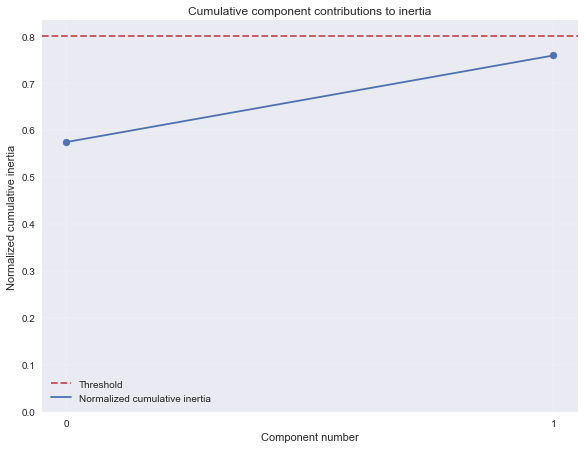

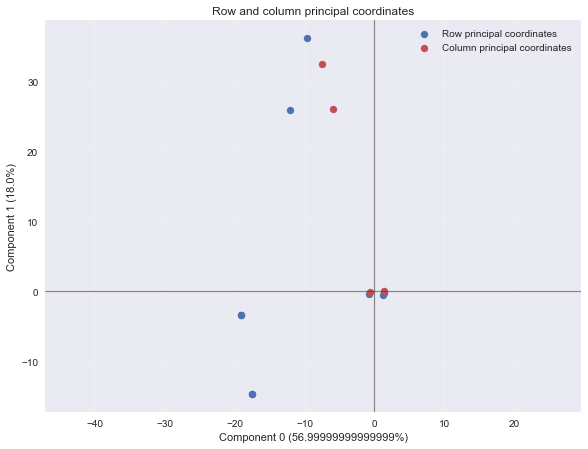

In [20]:
ca_v71_v75 = prince.CA(v71_v75)
fig1, ax1 = ca_v71_v75.plot_cumulative_inertia()
fig2, ax2 = ca_v71_v75.plot_rows_columns()
plt.show()

In [21]:
v3 = pd.crosstab(index=train['v3'], columns='counter'); v3

col_0,counter
v3,
A,227
B,53
C,110584


In [22]:
v110 = pd.crosstab(index=train['v110'], columns='counter'); v110

col_0,counter
v110,
A,55688
B,55426
C,3207


In [23]:
v3_v110 = pd.crosstab(index=train['v3'], columns=train['v110'], dropna=False); v3_v110

v110,A,B,C
v3,,,
A,0,227,0
B,0,53,0
C,55688,54896,0


In [24]:
print(train[train['v110']=='C'].shape)
print(train[train['v3'].isnull()].shape)

(3207, 133)
(3457, 133)


From the contingency tables, we can notice that v110's C has similar distribution against v3's NaN. Also, v3's C could be divided into two categories based on v110's A and B. It might be able to merge the two variables into a single variable.

### Numerical variables

### Correlation of Numerical Variables

In [696]:
numerical_corr = numericals.corr()

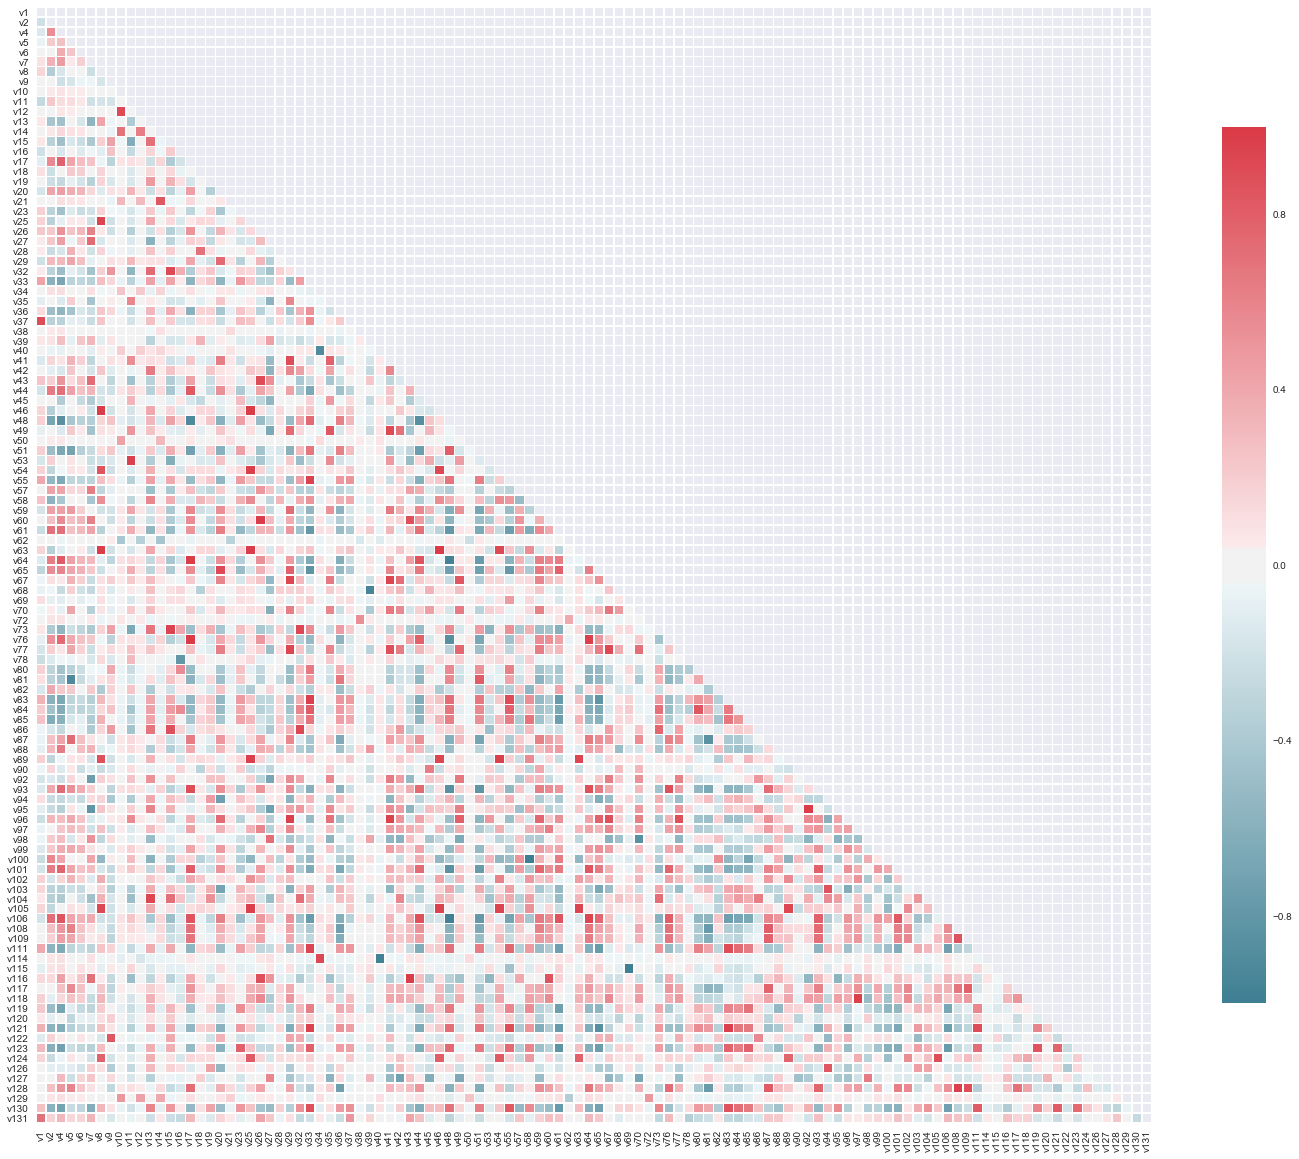

In [26]:
mask = np.zeros_like(numerical_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(25, 23))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numerical_corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

In [27]:
# Compute mean square error and r square for each paired numerical features
association = pd.DataFrame(columns=['VAR1', 'VAR2', 'MSE', 'R2'])
numerical_cols = list(numericals)
for i in range(len(numerical_cols)):
    col1 = numerical_cols[i]
    for j in range(i+1, len(numerical_cols)):
        col2 = numerical_cols[j]
        est = smf.ols(formula=col1+'~'+col2, data=train).fit()
        r2 = est.rsquared
        mse = est.mse_resid
        row = pd.DataFrame(np.array([[col1, col2, mse, r2]]), columns=['VAR1', 'VAR2', 'MSE', 'R2'])
        association = association.append(row, ignore_index=True)

In [28]:
# Extract paired variables with R2 greater than 0.9
association[association['R2'].astype(float) > 0.9].sort_values('R2', ascending=False)

,VAR1,VAR2,MSE,R2
4298,v58,v100,0.218309135379,0.995335599752
4874,v69,v115,0.0454313266859,0.987421900909
1607,v17,v76,0.0533608086314,0.985396220743
3673,v46,v63,0.140138117662,0.983288974703
1599,v17,v64,0.125861912941,0.965554127823
2139,v25,v46,0.308221007727,0.964747018336
2153,v25,v63,0.328394374662,0.962439676147
2239,v26,v60,0.0115863044064,0.96186475362
3780,v48,v106,0.184130699735,0.961824056548
3500,v43,v116,0.0183755998121,0.956238055709


In [29]:
est = smf.ols(formula='v129~v38+v62+v72', data=train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   v129   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.514e+28
Date:                Thu, 27 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:31:25   Log-Likelihood:             3.0773e+06
No. Observations:              114321   AIC:                        -6.155e+06
Df Residuals:                  114317   BIC:                        -6.155e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.256e-13   3.09e-15   -137.687      0.000   -4.32e-13    -4.2e-13
v38           -1.0000   3.34e-15     -3e+14      0.000      -1.000      -1.000
v62           -1.0000   2.56e-15   -3.9e+14      0.000      -1.000      -1.000
v72            1.0000   2.26e-15   4.43e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                    51886.060   Durbin-Watson:                   0.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307966.179
Skew:                           2.134   Prob(JB):                         0.00
Kurtosis:                       9.814   Cond. No.                         6.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

v129 is exactly a linear combination of v38, v62, and v72. Hence, v129 can be removed without losing any information.

In [30]:
est = smf.ols(formula='v34~v40+v10', data=train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    v34   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.884e+17
Date:                Thu, 27 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:31:25   Log-Likelihood:             1.4447e+06
No. Observations:              114210   AIC:                        -2.889e+06
Df Residuals:                  114207   BIC:                        -2.889e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8267    8.1e-09   1.46e+09      0.000      11.827      11.827
v40           -0.6324    7.4e-10  -8.55e+08      0.000      -0.632      -0.632
v10            0.6365   1.68e-09   3.78e+08      0.000       0.636       0.636
==============================================================================
Omnibus:                     2091.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.134
Skew:                          -0.004   Prob(JB):                    1.08e-250
Kurtosis:                       2.508   Cond. No.                         39.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Finding the denominator for numerical variables in order to convert them back to integers

In [587]:
def f(x, col):
    return np.sum(round(train[col] / x, 2) % 1)

### v10

In [729]:
v10 = train['v10'].dropna().sort_values()
v10_diff = v10.rolling(2).apply(lambda x: x[1]-x[0])
v10_diff[v10_diff>0.000001].value_counts().head(10)

0.021880    1
0.021880    1
0.021880    1
0.021881    1
0.021881    1
0.021881    1
0.021882    1
0.021880    1
0.021880    1
0.021881    1
Name: v10, dtype: int64

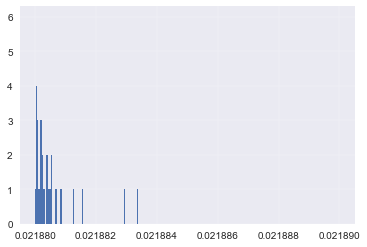

In [730]:
p = plt.hist(v10_diff[1:], range=[0.02188, 0.02189], bins=1000)

In [731]:
res_v10 = optimize.brute(f, args=('v10', ), ranges=((0.02188, 0.021882), ), Ns=1000) ; res_v10[0]

0.02188170970970971

### v40

In [529]:
v40 = train['v40'].dropna().sort_values()
v40_diff = v40.rolling(2).apply(lambda x: x[1]-x[0])
v40_diff[v40_diff>0.000001].value_counts().head(10)

0.000722    5
0.000722    5
0.000722    4
0.000722    4
0.000722    4
0.000722    4
0.000722    4
0.000722    4
0.000722    4
0.000722    4
Name: v40, dtype: int64

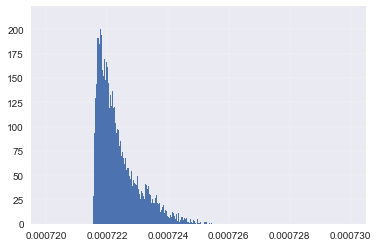

In [607]:
p = plt.hist(v40_diff[1:], range=[0.00072, 0.00073], bins=1000)

In [602]:
res_v40 = optimize.brute(f, args=('v40', ), ranges=((0.00072, 0.000725), ), Ns=1000) ; res_v40[0]

0.00072353656960106455

### v50

In [572]:
v50 = train['v50'].dropna().sort_values()
v50_diff = v50.rolling(2).apply(lambda x: x[1]-x[0])

In [573]:
v50_diff[v50_diff>0.00001].value_counts().head(10)

0.001465    3
0.001465    2
0.001465    2
0.001465    2
0.001466    2
0.001465    2
0.001466    2
0.001465    2
0.001465    2
0.001465    2
Name: v50, dtype: int64

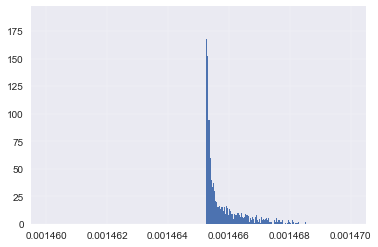

In [608]:
p = plt.hist(v50_diff[1:], range=[0.00146, 0.00147], bins=1000)

In [590]:
res_v50 = optimize.brute(f, args=('v50', ), ranges=((0.001465, 0.001468), ), Ns=1000); res_v50[0]

0.0014672432432432431

In [591]:
round((train['v50']/ res_v50[0]), 2).head(10)

0     613.0
1     940.0
2     412.0
3    2269.0
4     930.0
5    1127.0
6      91.0
7    1828.0
8    1142.0
9     677.0
Name: v50, dtype: float64

In [612]:
# denominators for variables v10, v40, v50
print(res_v10[0], res_v40[0], res_v50[0]) 

0.0218817097097 0.000723536569601 0.00146724324324


In [654]:
train['v40-v50'] = round(train['v40']/res_v40[0], 2) - round(train['v50']/res_v50[0], 2)

In [660]:
train[train['v22']=='ZLS'][['v22', 'v40-v50', 'v50', 'target']].sort_values(['v40-v50','v50'])

,v22,v40-v50,v50,target
111484,ZLS,6281.0,0.583962,1
104707,ZLS,7003.0,4.340108,1
24194,ZLS,7422.0,2.039468,1
35911,ZLS,7424.0,4.492701,1
62306,ZLS,7471.0,0.488592,1
38526,ZLS,9790.0,1.637444,1
98326,ZLS,10229.0,2.968234,1
96814,ZLS,10524.0,1.656519,0
46214,ZLS,10524.0,2.165651,0
10074,ZLS,12840.0,0.289047,1


In [652]:
train.groupby(['v22', 'v40-v50'])['target'].mean()

v22   v40-v50
AA    10759.0    1.0
      14667.0    1.0
      18561.0    1.0
      19045.0    0.0
AAA   8136.0     1.0
      14226.0    1.0
      14860.0    1.0
AAAA  7832.0     1.0
AAAB  9086.0     0.0
      9526.0     1.0
      10598.0    1.0
      12804.0    1.0
      13345.0    1.0
      14482.0    1.0
      16153.0    1.0
      16957.0    1.0
      17316.0    1.0
      17373.0    1.0
      18384.0    1.0
      19668.0    1.0
AAAC  11476.0    1.0
      12267.0    1.0
AAAE  13909.0    1.0
      20517.0    1.0
AAAF  11649.0    1.0
AAAG  14272.0    0.0
AAAH  16853.0    0.0
AAAK  1697.0     1.0
      3017.0     1.0
      5014.0     0.0
                ... 
ZZW   12280.0    1.0
      12286.0    1.0
      12693.0    1.0
      12700.0    1.0
      13347.0    1.0
      13677.0    1.0
      14092.0    1.0
      14393.0    1.0
      14607.0    0.0
      14807.0    1.0
      14858.0    1.0
      14920.0    1.0
      14967.0    1.0
      15546.0    1.0
      15804.0    1.0
      15841.0    0.0

In [662]:
train.loc[train['v22']=='ZLS'][['target', 'v22', 'v40-v50']].sort_values(['v22', 'v40-v50'])

,target,v22,v40-v50
111484,1,ZLS,6281.0
104707,1,ZLS,7003.0
24194,1,ZLS,7422.0
35911,1,ZLS,7424.0
62306,1,ZLS,7471.0
38526,1,ZLS,9790.0
98326,1,ZLS,10229.0
46214,0,ZLS,10524.0
96814,0,ZLS,10524.0
5724,1,ZLS,12840.0


### Correlations with target variable

In [31]:
selected_features = ['v3', 'v10', 'v12', 'v13', 'v14', 'v21', 'v24', 'v33', 'v34', 'v38',
       'v40', 'v47', 'v50', 'v55', 'v56', 'v58', 'v62', 'v66', 'v71',
       'v72', 'v74', 'v83', 'v84', 'v85', 'v91', 'v100', 'v111', 'v112',
       'v113', 'v114', 'v121', 'v129', 'v130', 'v22', 'v125', 'v52', 'v30',
       'v5', 'v98', 'v87', 'v70', 'v6', 'v88', 'v57', 'v131', 'v102',
       'v28', 'v120', 'v39', 'v1', 'v115', 'v16', 'v45', 'v99', 'v68',
       'v126', 'v80', 'v90', 'v18', 'v78', 'v26', 'v2', 'v44', 'v69',
       'v101', 'v127', 'v7', 'v35', 'v122', 'v97', 'v9', 'v27', 'v19',
       'v20', 'v15', 'v86', 'v60', 'v103', 'v43', 'v4', 'v11', 'v104',
       'v59', 'v42', 'v94', 'v61', 'v32', 'v93', 'v65', 'v49', 'v77',
       'v48', 'v41']

In [722]:
abs(numericals.corrwith(train.target)).sort_values(ascending=False)

v50     0.241683
v10     0.148680
v129    0.142141
v14     0.130670
v34     0.095884
v62     0.093709
v114    0.075786
v72     0.075241
v21     0.067634
v38     0.061863
v4      0.059842
v119    0.058578
v123    0.055940
v48     0.055493
v12     0.054710
v106    0.054226
v93     0.051708
v64     0.050931
v101    0.050835
v85     0.050820
v51     0.049183
v61     0.047781
v17     0.047620
v44     0.046616
v130    0.046252
v33     0.046213
v55     0.045500
v83     0.045349
v76     0.045078
v121    0.044467
          ...   
v90     0.011763
v8      0.011442
v19     0.010894
v97     0.010522
v63     0.010366
v41     0.010202
v94     0.010085
v46     0.009907
v102    0.009728
v92     0.009707
v16     0.009692
v53     0.008830
v78     0.008136
v1      0.008114
v25     0.008079
v124    0.006770
v67     0.006418
v77     0.006359
v89     0.005407
v54     0.005125
v105    0.004771
v118    0.004366
v18     0.003965
v70     0.003867
v122    0.003251
v35     0.002863
v49     0.002467
v42     0.0010

In [665]:
len(set(abs(numericals.corrwith(train.target)).sort_values(ascending=False).head(80).index)-set(columns_to_remove))

74

In [700]:
train[categoricals.columns].fillna('99', inplace=True)

In [701]:
# label encode the categorical variables
for c in categoricals.columns:
    le = preprocessing.LabelEncoder()
    le.fit(train[c])
    train[c] = le.transform(train[c])

In [708]:
abs(train[categoricals.columns].corrwith(train.target)).sort_values(ascending=False)

v110    0.153144
v47     0.148274
v31     0.148054
v113    0.103690
v66     0.064888
v79     0.032034
v56     0.029177
v74     0.026532
v3      0.021289
v30     0.020047
v107    0.018077
v24     0.014172
v112    0.010992
v91     0.007168
v75     0.004346
v71     0.002399
v125    0.002279
v52     0.002093
v22     0.001112
dtype: float64

In [709]:
vars = ['v10', 'v12', 'v14', 'v21', 'v22', 'v24', 'v30', 'v31', 'v34', 'v38', 'v40', 'v47', 'v50', 'v52', 'v56', 'v62', 
'v66', 'v72', 'v75', 'v79', 'v107','v112', 'v113', 'v114', 'v129']